In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_excel("3KOBROS Limited_RAW-REPORT_2025-01-01_2025-11-04.xlsx", sheet_name="Menus")
df.head(3)

C:\Users\borium\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,SALES ID,DATE,TIME,DATA TYPE,RECEIPT,TABLE,GUESTS,Order Type,State,Sub Total,...,CASH,CARD,WEB,Other,Loyalty Payment,Item,Code,Quantity,Price,Tax Rate
0,1.0,2025-06-05,12:58:51,Order,250605125901,1,3,DineIn,Voided,0.0,...,0.0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2.0,2025-06-05,13:02:09,Order,250605131316,12,2,DineIn,Finalised,32.5,...,0.0,35.75,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,2025-06-05,13:02:09,Item,250605131316,12,2,DineIn,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Soondubu Jjigae,NaN,1.0,14.0,20.0


In [68]:

df = df.ffill()
df["State"].unique()

array(['Voided', 'Finalised', 'Unknown (8)', 'Ordered', 'Created'],
      dtype=object)

In [69]:
df = df[~df["State"].isin(["Voided"])]


In [84]:
df['TIME'] = pd.to_datetime(df['TIME'], format="%H:%M:%S").dt.time
df['DATE'] = pd.to_datetime(df["DATE"])

def get_meal_period(t):
    if t >= pd.to_datetime("10:00:00").time() and t <= pd.to_datetime("15:00:00").time():
        return "Lunch"
    else:
        return "Dinner"

df["Meal Period"] = df["TIME"].apply(get_meal_period)

daily_sales = (
    df.groupby(["DATE", "Meal Period"])["GROSS"].sum()
        .reset_index()
        .pivot(index="DATE", columns="Meal Period", values="GROSS")
        .fillna(0)
    
)

df.head(30)

,SALES ID,DATE,TIME,DATA TYPE,RECEIPT,TABLE,GUESTS,Order Type,State,Sub Total,...,CARD,WEB,Other,Loyalty Payment,Item,Code,Quantity,Price,Tax Rate,Meal Period
1,2.0,2025-06-05,13:02:09,Order,250605131316,12,2,DineIn,Finalised,32.5,...,35.75,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Lunch
2,2.0,2025-06-05,13:02:09,Item,250605131316,12,2,DineIn,Finalised,32.5,...,35.75,0.0,0.0,0.0,Soondubu Jjigae,NaN,1.0,14.0,20.0,Lunch
3,2.0,2025-06-05,13:02:09,Item,250605131316,12,2,DineIn,Finalised,32.5,...,35.75,0.0,0.0,0.0,Chicken Teriyaki,NaN,1.0,16.5,20.0,Lunch
4,2.0,2025-06-05,13:02:09,Item,250605131316,12,2,DineIn,Finalised,32.5,...,35.75,0.0,0.0,0.0,Coke,NaN,1.0,2.0,20.0,Lunch
6,4.0,2025-06-05,14:00:06,Order,250605140949,4,4,DineIn,Finalised,81.9,...,90.09,0.0,0.0,0.0,Coke,NaN,1.0,2.0,20.0,Lunch
7,4.0,2025-06-05,14:00:06,Item,250605140949,4,4,DineIn,Finalised,81.9,...,90.09,0.0,0.0,0.0,Gim Mari,NaN,1.0,6.5,20.0,Lunch
8,4.0,2025-06-05,14:00:06,Item,250605140949,4,4,DineIn,Finalised,81.9,...,90.09,0.0,0.0,0.0,A Bowl of Mixed Salad with Egg,NaN,1.0,7.5,20.0,Lunch
9,4.0,2025-06-05,14:00:06,Item,250605140949,4,4,DineIn,Finalised,81.9,...,90.09,0.0,0.0,0.0,Tofu Teriyaki Bibimbap,NaN,1.0,13.0,20.0,Lunch
10,4.0,2025-06-05,14:00:06,Item,250605140949,4,4,DineIn,Finalised,81.9,...,90.09,0.0,0.0,0.0,Bulgogi Bibimbap,NaN,1.0,14.0,20.0,Lunch
11,4.0,2025-06-05,14:00:06,Item,250605140949,4,4,DineIn,Finalised,81.9,...,90.09,0.0,0.0,0.0,Jeyuk Bokkeum,NaN,1.0,16.5,20.0,Lunch


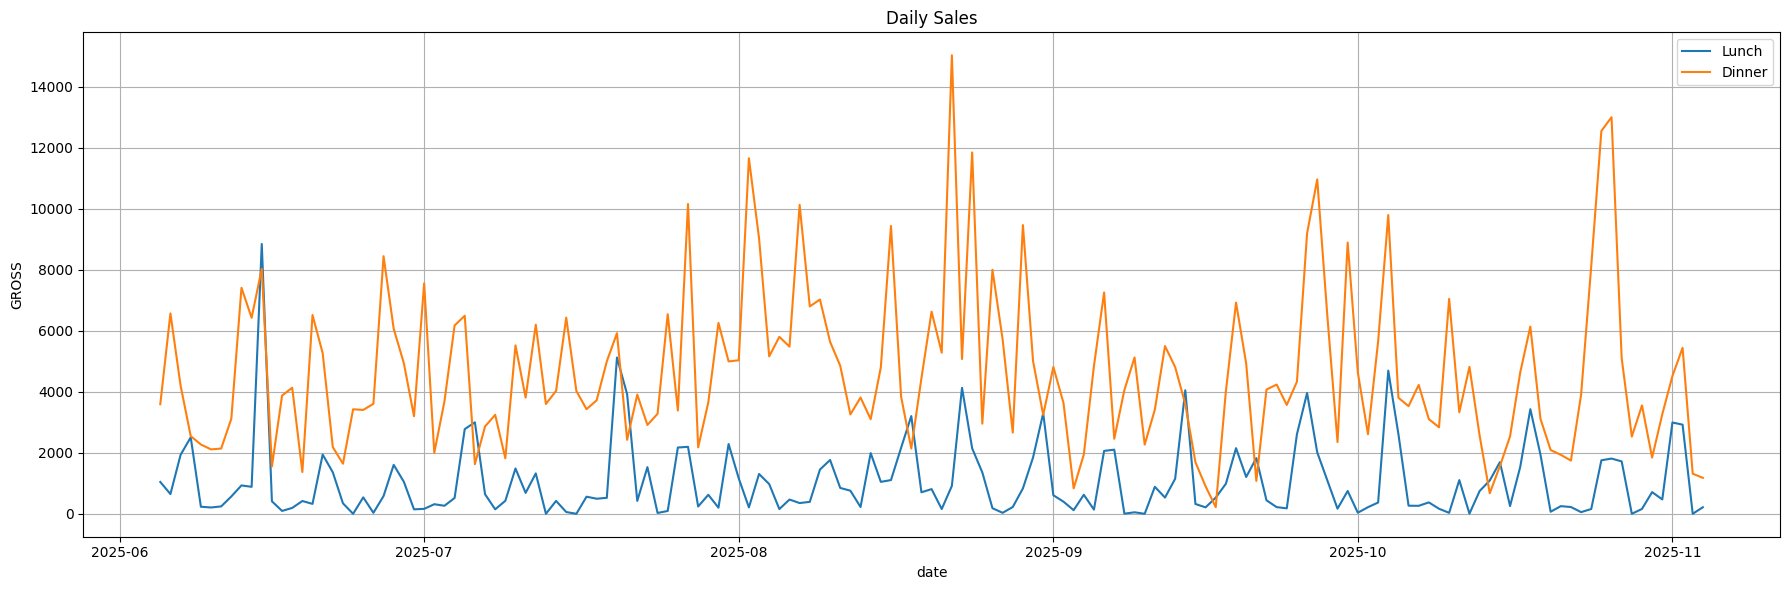

In [86]:
plt.figure(figsize=(18,6))
# plt.figure()
plt.plot(daily_sales.index, daily_sales["Lunch"], label="Lunch")
plt.plot(daily_sales.index, daily_sales["Dinner"], label="Dinner")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Daily Sales")
plt.xlabel("date")
plt.ylabel("GROSS")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
